In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv('ulazni_podaci_isunstruct.csv')
df.head()

,Naziv_proteina,molska_frakcija_za_A,molska_frakcija_za_C,molska_frakcija_za_D,molska_frakcija_za_E,molska_frakcija_za_F,molska_frakcija_za_G,molska_frakcija_za_H,molska_frakcija_za_I,molska_frakcija_za_K,...,molska_frakcija_za_N,molska_frakcija_za_P,molska_frakcija_za_Q,molska_frakcija_za_R,molska_frakcija_za_S,molska_frakcija_za_T,molska_frakcija_za_V,molska_frakcija_za_W,molska_frakcija_za_Y,Klasifikacija
0,AAD14585.1 ___virion spike glycoprotein precursor,0.0638,0.0247,0.0494,0.0514,0.0576,0.0885,0.0165,0.0782,0.0473,...,0.0473,0.0432,0.0391,0.0576,0.0391,0.0885,0.0556,0.0288,0.0288,uređen
1,AAD14585.1 ___virion spike glycoprotein precursor,0.0895,0.0000,0.0579,0.0579,0.0105,0.0526,0.0526,0.0211,0.0368,...,0.0737,0.0737,0.0421,0.0263,0.1526,0.1579,0.0421,0.0000,0.0053,neuređen
2,AAQ55048.1 ___virion spike glycoprotein precursor,0.0671,0.0252,0.0482,0.0503,0.0566,0.0901,0.0168,0.0776,0.0482,...,0.0482,0.0440,0.0398,0.0566,0.0356,0.0881,0.0545,0.0294,0.0294,uređen
3,AAQ55048.1 ___virion spike glycoprotein precursor,0.0905,0.0000,0.0553,0.0653,0.0101,0.0503,0.0503,0.0201,0.0352,...,0.0704,0.0854,0.0402,0.0352,0.1407,0.1558,0.0402,0.0000,0.0050,neuređen
4,ABX75367.1 ___virion spike glycoprotein precursor,0.0638,0.0247,0.0494,0.0514,0.0576,0.0885,0.0165,0.0782,0.0473,...,0.0473,0.0432,0.0391,0.0576,0.0391,0.0885,0.0556,0.0288,0.0288,uređen


In [3]:
df.any()

Naziv_proteina          True
molska_frakcija_za_A    True
molska_frakcija_za_C    True
molska_frakcija_za_D    True
molska_frakcija_za_E    True
molska_frakcija_za_F    True
molska_frakcija_za_G    True
molska_frakcija_za_H    True
molska_frakcija_za_I    True
molska_frakcija_za_K    True
molska_frakcija_za_L    True
molska_frakcija_za_M    True
molska_frakcija_za_N    True
molska_frakcija_za_P    True
molska_frakcija_za_Q    True
molska_frakcija_za_R    True
molska_frakcija_za_S    True
molska_frakcija_za_T    True
molska_frakcija_za_V    True
molska_frakcija_za_W    True
molska_frakcija_za_Y    True
Klasifikacija           True
dtype: bool

In [4]:
y = df['Klasifikacija']
X = df.drop(columns=['Naziv_proteina', 'Klasifikacija'], axis=1)

In [5]:
X.shape

(1282, 20)

In [6]:
y.shape

(1282,)

In [7]:
feature_names = X.columns
df[feature_names]

,molska_frakcija_za_A,molska_frakcija_za_C,molska_frakcija_za_D,molska_frakcija_za_E,molska_frakcija_za_F,molska_frakcija_za_G,molska_frakcija_za_H,molska_frakcija_za_I,molska_frakcija_za_K,molska_frakcija_za_L,molska_frakcija_za_M,molska_frakcija_za_N,molska_frakcija_za_P,molska_frakcija_za_Q,molska_frakcija_za_R,molska_frakcija_za_S,molska_frakcija_za_T,molska_frakcija_za_V,molska_frakcija_za_W,molska_frakcija_za_Y
0,0.0638,0.0247,0.0494,0.0514,0.0576,0.0885,0.0165,0.0782,0.0473,0.0926,0.0021,0.0473,0.0432,0.0391,0.0576,0.0391,0.0885,0.0556,0.0288,0.0288
1,0.0895,0.0000,0.0579,0.0579,0.0105,0.0526,0.0526,0.0211,0.0368,0.0316,0.0158,0.0737,0.0737,0.0421,0.0263,0.1526,0.1579,0.0421,0.0000,0.0053
2,0.0671,0.0252,0.0482,0.0503,0.0566,0.0901,0.0168,0.0776,0.0482,0.0922,0.0021,0.0482,0.0440,0.0398,0.0566,0.0356,0.0881,0.0545,0.0294,0.0294
3,0.0905,0.0000,0.0553,0.0653,0.0101,0.0503,0.0503,0.0201,0.0352,0.0352,0.0151,0.0704,0.0854,0.0402,0.0352,0.1407,0.1558,0.0402,0.0000,0.0050
4,0.0638,0.0247,0.0494,0.0514,0.0576,0.0885,0.0165,0.0782,0.0473,0.0926,0.0021,0.0473,0.0432,0.0391,0.0576,0.0391,0.0885,0.0556,0.0288,0.0288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,0.0586,0.0000,0.0405,0.0676,0.0135,0.0495,0.0405,0.0270,0.0360,0.0541,0.0225,0.0450,0.1351,0.0495,0.0315,0.1126,0.1622,0.0541,0.0000,0.0000
1278,0.0565,0.0261,0.0478,0.0522,0.0609,0.0739,0.0239,0.0696,0.0500,0.0913,0.0043,0.0565,0.0500,0.0348,0.0457,0.0370,0.0913,0.0674,0.0304,0.0304
1279,0.0370,0.0000,0.0556,0.0648,0.0046,0.0278,0.0417,0.0324,0.0139,0.0463,0.0185,0.0787,0.1528,0.0463,0.0648,0.0880,0.1806,0.0417,0.0000,0.0046
1280,0.0722,0.0271,0.0406,0.0609,0.0564,0.0835,0.0181,0.0790,0.0406,0.0903,0.0045,0.0542,0.0406,0.0339,0.0587,0.0429,0.0813,0.0587,0.0339,0.0226


In [8]:
y.unique()

array(['uređen', 'neuređen'], dtype=object)

In [9]:
y.replace("uređen", 1, inplace=True)
y.replace("neuređen", 0, inplace = True)

/tmp/ipykernel_6490/439406901.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace("neuređen", 0, inplace = True)


In [10]:
y

0       1
1       0
2       1
3       0
4       1
       ..
1277    0
1278    1
1279    0
1280    1
1281    0
Name: Klasifikacija, Length: 1282, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [12]:
#Cuvanje trening i test podataka u CSV datoteke
trening_podaci = pd.concat([X_train, y_train], axis=1)
test_podaci = pd.concat([X_test, y_test], axis=1)
trening_podaci.to_csv('Trening podaci/trening_podaci_CART.csv', index=False)
test_podaci.to_csv('Test podaci/test_podaci_CART.csv', index=False)

X_test_index = X_test.index  


In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [14]:
from sklearn.model_selection import GridSearchCV

params = { 'criterion' : ['gini', 'entropy'],
           'max_depth' : [2,4,6,8]
         }

model = GridSearchCV(DecisionTreeClassifier(), params, scoring = 'accuracy', cv=5, verbose=2)

In [15]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]},
             scoring='accuracy', verbose=2)

In [16]:
model.best_score_

np.float64(1.0)

In [17]:
model.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [18]:
best_model = model.best_estimator_

In [19]:
best_model

DecisionTreeClassifier(max_depth=2)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
y_pred_train = model.predict(X_train) 
confusion_matrix(y_train, y_pred_train)

array([[448,   0],
       [  0, 449]])

In [22]:
y_pred = model.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

1.0

In [24]:
confusion_matrix(y_test, y_pred)

array([[193,   0],
       [  0, 192]])

In [25]:
# CSV fajl sa predikcijama za test skup
X_test = pd.DataFrame(X_test, index=X_test_index, columns=feature_names)

test_podaci = X_test.copy()  
test_podaci['Naziv_proteina'] = df.loc[X_test.index, 'Naziv_proteina']  
test_podaci['Stvarna vrednost'] = y_test  # Stvarne vrednosti
test_podaci['Predviđena vrednost'] = y_pred  # Predviđene vrednosti

test_podaci['Stvarna vrednost'] = test_podaci['Stvarna vrednost'].replace({0: 'neuređeno', 1: 'uređeno'})
test_podaci['Predviđena vrednost'] = test_podaci['Predviđena vrednost'].replace({0: 'neuređeno', 1: 'uređeno'})

test_podaci.insert(0, 'Naziv_proteina', test_podaci.pop('Naziv_proteina'))

# CSV fajl sa predikcijama za test skup
test_podaci.to_csv('Predikcije test skupa/predikcije_test_skupa_CART.csv', index=False)

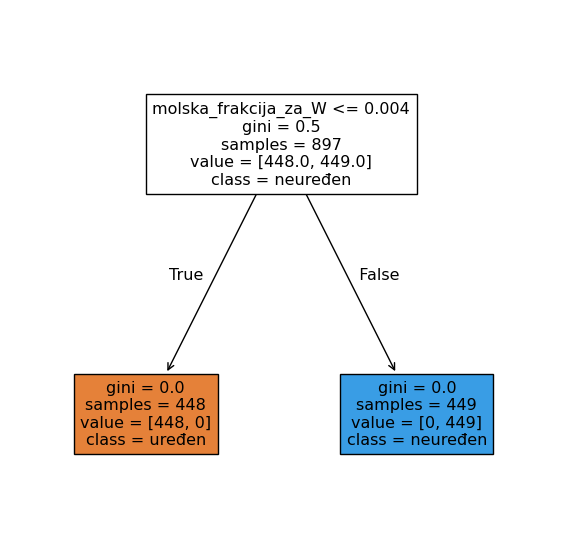

In [26]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7, 7))
plot_tree(best_model, class_names=['uređen', 'neuređen'], feature_names=feature_names, filled=True)
plt.show()